<a href="https://colab.research.google.com/github/Sank3t-Pand3y/MachineLearning_Projects/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

## Create Dataset

### Create dataset
Next you'll create a 2-dimensional dataset containing two linearly correlated features.

You'll use a bivariate normal distribution.

Both features, X1 and X2, will have zero mean and a covariance given by the (symmetric) covariance matrix:

\begin{equation}
\begin{pmatrix}
  3  & 2     \\\\\\\\
  2  & 2     \\
\end{pmatrix}
\end{equation}

Here, the diagonal elements define the variances of X1 and X2 (3 and 2, respectively), while the off-diagonal element is the covariance (2) between X1 and X2, which expresses how similarly these features vary.


In [2]:
np.random.seed(42)
mean = [0,0]
cov = [[3,2],[2,2]]

X = np.random.multivariate_normal(mean=mean,cov=cov,size = 200)

In [3]:
X

array([[-7.79842558e-01, -7.25035362e-01],
       [-1.71097070e+00, -5.64228380e-02],
       [ 4.89591649e-01,  1.85568480e-01],
       [-2.97122622e+00, -1.67515888e+00],
       [ 5.69236811e-01,  9.00239014e-01],
       [ 9.69916161e-01,  3.66038690e-01],
       [ 3.72329343e-01, -1.31659722e+00],
       [ 3.13291389e+00,  1.97374029e+00],
       [ 1.57697817e+00,  1.49525938e+00],
       [ 2.10410746e+00,  4.56393273e-01],
       [-2.37531795e+00, -2.04426174e+00],
       [ 4.66901868e-01, -8.32352558e-01],
       [ 8.71231068e-01,  7.73420205e-01],
       [ 1.78452439e+00,  1.70892989e+00],
       [ 1.12999928e+00,  6.37231499e-01],
       [ 2.58134249e-01,  1.75760187e+00],
       [ 4.53736035e-01, -5.34292484e-01],
       [-8.87208561e-01, -1.71831447e+00],
       [ 4.46952492e-01, -1.29730430e+00],
       [ 2.15569151e+00,  1.84849172e+00],
       [-1.31299097e+00, -8.81189775e-01],
       [ 3.17385058e-01, -5.14359599e-03],
       [ 2.78232697e+00,  1.56765052e+00],
       [ 3.

In [4]:
X.shape

(200, 2)

## visualize the Relationship between the Two Features.

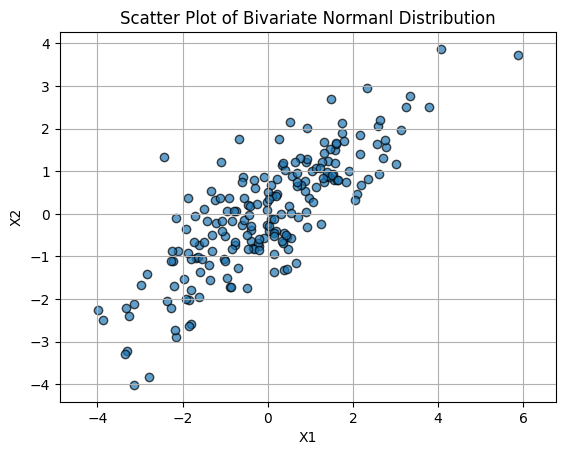

In [5]:
plt.figure()
plt.scatter(X[:,0], X[:,1], edgecolors='k', alpha=0.7)
plt.title("Scatter Plot of Bivariate Normanl Distribution")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')
plt.grid(True)
plt.show()

## Perfrom PCA on the Dataset.

we will initialize a 2-compoenent PCA model with default parameters and then fit and transform the feature space in one step.

In [6]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

## Get the Principal compoenets from the Mdodel.


The principal components are the principal axes, represented in feature space coordinates, which align with the directions of maximum variance in data.

In [8]:
components = pca.components_
components

array([[ 0.78215821,  0.62307987],
       [-0.62307987,  0.78215821]])

The Principal components are sorted in decreasing order by their explained variance, which can be expressed as raio:

In [9]:
pca.explained_variance_ratio_

array([0.9111946, 0.0888054])

NOTE:- you can see that the first component explains over 90% of the variance in the data, while the second explains about 9%

In [10]:
projection_pc1 = np.dot(X, components[0])
projection_pc2 = np.dot(X, components[1])

In [11]:
x_pc1 = projection_pc1 * components[0][0]
y_pc1 = projection_pc1 * components[0][1]
x_pc2 = projection_pc2 * components[1][0]
y_pc2 = projection_pc2 * components[1][1]

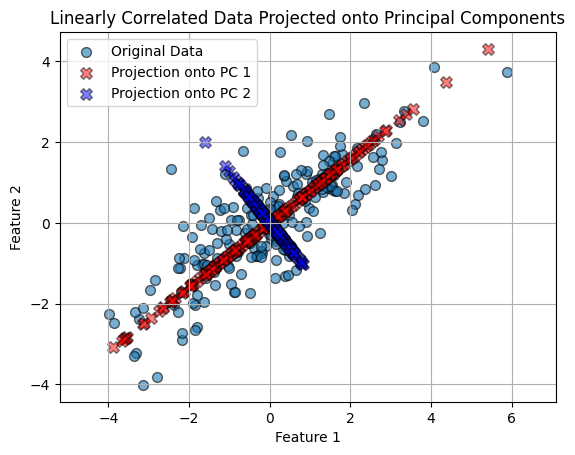

In [12]:
# Plot original data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], label='Original Data', ec='k', s=50, alpha=0.6)

# Plot the projections along PC1 and PC2
plt.scatter(x_pc1, y_pc1, c='r', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 1')
plt.scatter(x_pc2, y_pc2, c='b', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 2')
plt.title('Linearly Correlated Data Projected onto Principal Components', )
plt.xlabel('Feature 1',)
plt.ylabel('Feature 2',)
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

NOTE :- We can see what the principal coordinates mean.

The data varies in two main directions .i.e. The first direction, in red, is aligned in the direction having the widest variation, and the second direction, in blue, is perpendicular to first and has a lower variance.

## PCA for feature space dimensionality Reduction.

We are using the iris datasets.

In [14]:
# Load the Iris datasets.
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names




In [15]:
# Standardize the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
X.shape

(150, 4)

In [17]:
X_scaled.shape

(150, 4)

The iris flower's names can be obtained by below code.

In [18]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Initialize a PCA model and reduce the iris data set dimensionality to two compoenents.

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

## Plot the PCA transformed into 2d.

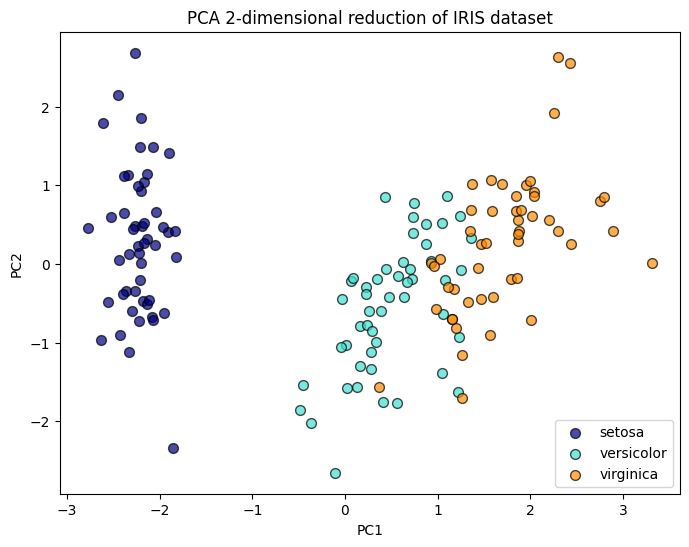

In [21]:
plt.figure(figsize=(8,6))

colors = ['navy','turquoise','darkorange']
lw = 1

for color, i, target_name in zip(colors, [0,1,2], target_names):
    plt.scatter( X_pca[y == i,0], X_pca[y == i,1], color = color, s=50, ec ='k', alpha=0.7 ,
                lw=lw, label = target_name)


plt.title('PCA 2-dimensional reduction of IRIS dataset',)
plt.xlabel("PC1",)
plt.ylabel("PC2",)
plt.legend(loc='best', shadow=False, scatterpoints=1,)
# plt.grid(True)
plt.show()

## What percentage of the original feature space variance do these two combined principal components explain ?

In [22]:
100*pca.explained_variance_ratio_.sum()

np.float64(95.81320720000166)

## Reinitialize the PCA model without reducing the dimension.

In [23]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

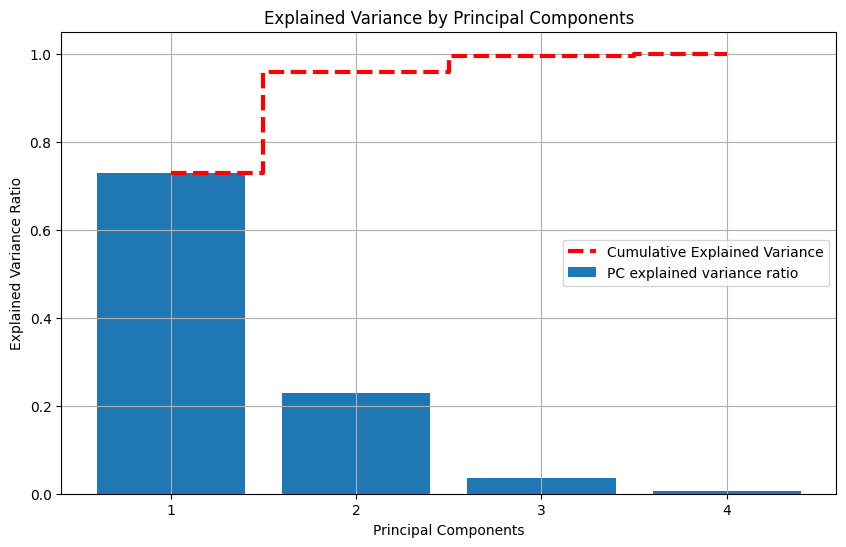

In [24]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio for each component
plt.figure(figsize=(10,6))
plt.bar(x=range(1, len(explained_variance_ratio)+1), height=explained_variance_ratio, alpha=1, align='center', label='PC explained variance ratio' )
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Principal Components')

# Plot cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.step(range(1, 5), cumulative_variance, where='mid', linestyle='--', lw=3,color='red', label='Cumulative Explained Variance')
# Only display integer ticks on the x-axis
plt.xticks(range(1, 5))
plt.legend()
plt.grid(True)
plt.show()